In [1]:
import numpy as np
import pypolychord as pp
from pypolychord.settings import PolyChordSettings as Settings
try: 
    from mpi4py import MPI
except ImportError: 
    pass

bounds = np.array([[1.610000000000000098e+00, 3.910000000000000142e+00],
                  [8.000000000000000444e-01, 1.199999999999999956e+00],
                  [5.000000000000000000e-01, 1.000000000000000000e+01],
                  [5.000000000000000104e-03, 1.000000000000000056e-01],
                  [1.000000000000000021e-03, 9.899999999999999911e-01],
                  [1.000000000000000021e-02, 8.000000000000000444e-01],
                  [9.874342179098187788e-01, 1.012565782090074640e+00],
                  [9.966815810147492405e-01, 1.003718418985220850e+00],
                  [9.947828966565528397e-01, 1.001317103343419390e+00],
                  [0.000000000000000000e+00, 2.000000000000000000e+02],
                  [0.000000000000000000e+00, 1.000000000000000000e+00],
                  [0.000000000000000000e+00, 1.000000000000000000e+01],
                  [0.000000000000000000e+00, 1.000000000000000000e+01],
                  [-1.452625672144938207e+00, 1.865262567205973454e+01],
                  [5.473743278550617930e-01, 2.065262567205973454e+01],
                  [-1.922365910661598321e+01, 6.622365910625386221e+01],
                  [-8.626256721449379938e+00, 1.924262567205973369e+02],
                  [0.000000000000000000e+00, 4.000000000000000000e+02],
                  [0.000000000000000000e+00, 4.000000000000000000e+02],
                  [0.000000000000000000e+00, 4.000000000000000000e+02],
                  [0.000000000000000000e+00, 4.000000000000000000e+02],
                  [-8.110513911504371731e-02, 3.411051391132544075e-01],
                  [-5.094726209860886423e-02, 3.109472620970751833e-01],
                  [7.631844753477834420e-03, 9.123681552426879948e-01],
                  [-1.548945241972177478e-01, 5.688945241941503195e-01],
                  [2.376318447534777611e-01, 1.142368155242687866e+00],
                  [-7.762089314791336125e-01, 4.652208931456128127e+00]])

covs = np.array([[1.966721383534008152e-04, 1.291097180639769482e-05, 5.693634640132524955e-07, 4.772209314169435741e-07, -4.496445527830370466e-06, 9.322408552378461512e-05, 9.421926820888628024e-06, 1.100375630390723051e-07, -1.098063919659239207e-07, -1.867817278813608617e-03, 1.945019518484858000e-04, 6.804441695333571802e-04, -1.743706029095589251e-03, 2.398915556636300149e-04, -3.089237148441134921e-04, -5.392956974194408485e-04, 7.206579943931729288e-04, -1.219105224558518150e-02, -5.581079408533948932e-03, 1.605451063743458572e-03, 2.727571544902513984e-03, -3.428669328492376554e-07, -1.074672941406098990e-05, 2.691855891555073173e-05, -2.767183985449993394e-05, -6.780842674588625166e-06, -5.885254697216294113e-05],
[1.291097180639769482e-05, 1.646619200415262962e-05, 3.251409454103747561e-07, 2.351037355320484764e-07, -3.265160708277847847e-06, 1.051608630160547711e-05, 5.238145478971220357e-07, -7.830483872810841638e-08, -3.691676919904805889e-08, -4.526237932462026659e-03, 1.000651573526806882e-04, 1.037752466452946006e-03, -2.183417664263036934e-03, 4.339736477057560410e-04, -2.429515749210827043e-04, 2.522140505599966475e-05, 1.864920975989914484e-03, -2.326633346370382896e-02, -6.762315602791633962e-03, 1.522375198907859441e-03, 4.722214767389054831e-03, 1.032871594370772548e-06, -1.221960085134954433e-06, 2.156505154462474777e-06, -1.036483327940581134e-05, -2.530887514584974091e-06, -3.379545397452541575e-05],
[5.693634640132524955e-07, 3.251409454103748090e-07, 9.212063134025508672e-08, 1.391594070291645980e-08, -1.103773889562868708e-07, 3.398521719362489189e-07, 2.988093356204596245e-08, -1.175296458405411480e-09, 2.276360650511476777e-10, 1.190675157504390539e-05, 7.712246886929452717e-07, 8.980932920923246268e-06, 5.971290867749152273e-06, -1.211291723766537345e-05, -1.909875415343608647e-06, 1.521040668790288746e-05, 1.313398998048145482e-05, -1.315885065825533625e-05, -9.011906740515441096e-06, -4.213246579441229034e-06, -4.496327934757195308e-05, 9.839322191796502877e-08, -1.488372163507621807e-07, 2.237268644610322893e-07, -5.231558505380252313e-07, -1.867680018454237689e-07, -2.755337555428385298e-06],
[4.772209314169435741e-07, 2.351037355320484764e-07, 1.391594070291645980e-08, 2.138370469132431626e-08, -9.702091419030872694e-08, 2.832443139812360688e-07, 2.780208008759507390e-08, 2.313370806111571111e-09, -2.950566481868137484e-09, -8.319685402590344366e-05, 1.803533326643015055e-06, 2.366750017560818520e-05, -3.689887587005944813e-05, 4.562124638633241647e-07, -5.315582600298943303e-06, -7.424755493179785135e-06, 1.765352134807569805e-05, -3.681425798728743407e-04, -1.983589714813643347e-04, -3.970685391895357531e-05, 2.652409785256879630e-05, -5.504548860097016157e-09, -9.566731652538358121e-08, 8.564635138489097794e-08, -4.025187512797479860e-07, -3.965557936435896468e-07, -2.149066315403973080e-06],
[-4.496445527830370466e-06, -3.265160708277847847e-06, -1.103773889562868708e-07, -9.702091419030872694e-08, 1.394726093194898534e-06, -3.539881615427495510e-06, -3.222041129005219137e-07, 6.820826705841200924e-10, 6.721681405047986245e-09, 3.212639343141516167e-04, -1.010900979733260186e-05, -1.156905457228009587e-04, 1.367861681033519185e-04, -3.694192796769718161e-05, -9.458923329074373309e-06, -7.211793542452755166e-05, -2.358969645213257157e-04, 1.172960391457248145e-03, 7.801958492158110820e-04, 1.367284442040983864e-04, -6.281580653975107019e-05, -1.280212889557101244e-07, 6.155834172337794701e-07, -1.046442654964174835e-06, 3.151952562604682984e-06, 2.818507684540549871e-06, 1.621699678213876124e-05],
[9.322408552378461512e-05, 1.051608630160547711e-05, 3.398521719362489189e-07, 2.832443139812360688e-07, -3.539881615427495510e-06, 5.174358354337599676e-05, -6.763214558948368343e-07, -6.484161873093832848e-09, -6.627004843804738926e-08, -1.412686429908375845e-03, 8.931851597674787412e-05, 4.960959957007298740e-04, -7.038927105643225665e-04, 3.484188076856450608e-04, 1.440874771790599557e-04, 1.291113723894453478e-04, 1.204948422747068645e-04, -9.669835250422193287e-03, -4.424727434889327501e-03, -4.859972101987741874e-04, -9.160974330562882519e-04, -1.191762907092016560e-06, -5.374045918621352499e-06, 1.081118955355929632e-05, -1.551068787501753841e-05, -1.077163176236280554e-05, -5.801937006069450510e-05],
[9.421926820888628024e-06, 5.238145478971220357e-07, 2.988093356204596245e-08, 2.780208008759507060e-08, -3.222041129005219137e-07, -6.763214558948366225e-07, 5.738080818983084905e-06, -4.464847859453632237e-09, 2.057609648714881388e-08, 8.511505527609262859e-04, -4.182042724098740133e-07, -1.476501415903019365e-05, 3.209315780199772537e-05, -3.331212944677270689e-05, -3.177580151682985588e-05, -5.318062898810102654e-05, 6.156563269907370205e-04, 4.096002077241992813e-03, 6.729934378756035999e-04, 3.325787617666090337e-04, 8.406803629987186569e-04, 1.607414576635672175e-06, -5.238536311184828745e-07, 1.685268930713236191e-06, -1.605852877164131272e-06, 3.230037921639516876e-06, 9.082081047635827195e-06],
[1.100375630390723977e-07, -7.830483872810842962e-08, -1.175296458405411480e-09, 2.313370806111571111e-09, 6.820826705841156463e-10, -6.484161873093827885e-09, -4.464847859453633892e-09, 3.621666982806814726e-07, -3.161360770199298257e-09, -1.898702657908959621e-04, 5.022332905149753311e-06, 1.018777233848232073e-04, -5.341026495441321886e-05, 1.700174073989781955e-04, -1.655719645030528822e-04, -4.780391529900653946e-05, 1.533471611937319470e-05, 3.728900306741834026e-03, 6.063046674428599605e-05, 4.413044026216462025e-04, 4.420446841185639341e-04, -2.205053610047921029e-07, 1.858013102762251966e-07, -1.050953589286479956e-06, 3.927111439084014283e-07, 2.300727265601282869e-07, -6.642737431428886122e-07],
[-1.098063919659239207e-07, -3.691676919904806551e-08, 2.276360650511474968e-10, -2.950566481868137484e-09, 6.721681405047987072e-09, -6.627004843804737602e-08, 2.057609648714881719e-08, -3.161360770199298257e-09, 3.798737350394670459e-07, 7.369885725422161641e-04, -5.382249937701086093e-07, -6.268476530103274900e-05, 2.193591589265928382e-05, -7.164534598549866799e-06, -4.243457996389883292e-05, 3.509693310553832686e-04, 8.158505755085517473e-04, 6.699283585270914519e-04, 1.212755517485945871e-04, -3.798619276994231412e-04, -1.341747722790597895e-03, 3.691984348375064547e-07, 3.520776381241082947e-07, -9.574885326964743776e-07, 5.299412709755262113e-08, -6.938440073983949600e-07, -1.509095277965382509e-06],
[-1.867817278813608617e-03, -4.526237932462026659e-03, 1.190675157504390369e-05, -8.319685402590347076e-05, 3.212639343141517794e-04, -1.412686429908375195e-03, 8.511505527609262859e-04, -1.898702657908959621e-04, 7.369885725422161641e-04, 4.357939283026010457e+01, -3.993385768616282139e-01, -8.662110055490285232e-01, -9.671750900001084561e-02, 1.264477368515303513e-01, 3.625661276030578417e-01, -5.895129285665473340e+00, -3.278800653065740534e+01, 3.496912420422429335e+01, 1.396730553147615073e+00, -1.350917297427253772e+01, -5.391148592308444876e+01, 2.324301781600246735e-03, -7.607650246677970457e-04, -7.606297953993399613e-03, -4.475889826468014941e-03, -1.628101174201617221e-02, -1.848750358104554389e-02],
[1.945019518484857458e-04, 1.000651573526806882e-04, 7.712246886929454834e-07, 1.803533326643014843e-06, -1.010900979733260186e-05, 8.931851597674788767e-05, -4.182042724098737486e-07, 5.022332905149753311e-06, -5.382249937701078682e-07, -3.993385768616281029e-01, 8.188687061824509450e-02, -4.443911058934599950e-02, 5.705378358625180085e-02, -1.661373733705787462e-02, 8.426066760461991406e-03, 1.103793543236826075e-01, 1.459835521320510254e-01, -5.321540195038449994e-01, 9.198762391550533435e-01, 1.700534795559929035e+00, 6.322752261253254957e-01, -8.838957034972747234e-06, 7.177601354732843739e-06, 2.891640985404954367e-04, 5.126211580939318770e-05, 1.716466543108219843e-04, 2.689540312294867296e-04],
[6.804441695333570718e-04, 1.037752466452946006e-03, 8.980932920923247962e-06, 2.366750017560818181e-05, -1.156905457228009723e-04, 4.960959957007297656e-04, -1.476501415903019534e-05, 1.018777233848232073e-04, -6.268476530103274900e-05, -8.662110055490285232e-01, -4.443911058934599950e-02, 3.762919316386755586e+00, -2.634993419837281081e+00, -1.483990588523521059e-01, 1.907406345212608045e-01, 2.570856109168323744e+00, 3.249332552985600309e+00, -2.962582552712839146e+01, -3.363281788858595078e+00, 7.271602054925047298e+00, 5.098385743108022616e+00, -1.523249895452206265e-04, 7.197099082731390357e-05, -2.010158847804655643e-03, -6.875052871483932097e-04, -1.836423659266276558e-03, -1.848823364229354232e-03],
[-1.743706029095589468e-03, -2.183417664263036934e-03, 5.971290867749152273e-06, -3.689887587005944813e-05, 1.367861681033519456e-04, -7.038927105643222413e-04, 3.209315780199770504e-05, -5.341026495441321886e-05, 2.193591589265928382e-05, -9.671750900001091500e-02, 5.705378358625180779e-02, -2.634993419837281081e+00, 5.679557862989463857e+00, 9.143199113996765270e-02, -2.007272448864249326e-01, -2.054052966180166973e+00, -2.380365182714726302e+00, 1.355703892910758590e+01, -4.558561915819478116e+00, -1.107857927312379331e+01, -8.849906493064768398e+00, -5.576943673436581542e-05, -1.349701862889897581e-03, -2.195580061364635523e-03, 8.466148416809643820e-04, 2.309419913119539888e-04, -8.725613075377692054e-03],
[2.398915556636299878e-04, 4.339736477057559868e-04, -1.211291723766538022e-05, 4.562124638633246411e-07, -3.694192796769717483e-05, 3.484188076856450608e-04, -3.331212944677270689e-05, 1.700174073989781955e-04, -7.164534598549862564e-06, 1.264477368515302402e-01, -1.661373733705787462e-02, -1.483990588523521614e-01, 9.143199113996763883e-02, 3.273983407244523303e+00, 5.160261285458043190e-01, 8.256891217781005265e-02, 6.130289452553309287e-02, -6.924559719467036523e+00, -7.368163288386213594e-01, -9.615791185156141729e-01, -6.292273545350594022e-01, -1.184497554319528714e-03, 1.102280476734968095e-03, 1.454538666631042046e-03, 9.088341969189153843e-04, -1.123612299170086452e-03, 2.002462445246404516e-04],
[-3.089237148441134921e-04, -2.429515749210827043e-04, -1.909875415343610341e-06, -5.315582600298943303e-06, -9.458923329074358063e-06, 1.440874771790599286e-04, -3.177580151682988298e-05, -1.655719645030528551e-04, -4.243457996389883970e-05, 3.625661276030578417e-01, 8.426066760461986202e-03, 1.907406345212608045e-01, -2.007272448864249326e-01, 5.160261285458043190e-01, 3.026862130276679608e+00, 2.657774486946730796e+00, 2.772620305766725135e+00, 5.098704955303388964e+00, -1.516625671193053915e+00, -7.553748613689448277e-01, -1.132047426602389661e+00, 1.182801512493591002e-03, 3.967829202259631760e-04, -2.133582355837178052e-03, 1.101972598682867278e-03, -5.625899253442973383e-04, -4.260286753622296793e-03],
[-5.392956974194411737e-04, 2.522140505599967830e-05, 1.521040668790288069e-05, -7.424755493179787676e-06, -7.211793542452752455e-05, 1.291113723894452665e-04, -5.318062898810099265e-05, -4.780391529900655302e-05, 3.509693310553832686e-04, -5.895129285665473340e+00, 1.103793543236826075e-01, 2.570856109168323300e+00, -2.054052966180166528e+00, 8.256891217781003878e-02, 2.657774486946730796e+00, 1.066177165440864094e+01, 1.911141143255897035e+01, -1.135080882017628312e+01, 3.350315802078033478e+00, 4.813553467363862026e+00, 5.430250613433121210e+00, 2.354396674934930347e-03, 8.724463910390375509e-04, -6.011352576925157142e-03, 1.085844900113334217e-03, -3.939466709795290227e-03, -6.266942311232840887e-03],
[7.206579943931724951e-04, 1.864920975989914050e-03, 1.313398998048144296e-05, 1.765352134807570143e-05, -2.358969645213256615e-04, 1.204948422747068238e-04, 6.156563269907368036e-04, 1.533471611937318454e-05, 8.158505755085517473e-04, -3.278800653065740534e+01, 1.459835521320510532e-01, 3.249332552985601197e+00, -2.380365182714726302e+00, 6.130289452553309981e-02, 2.772620305766725135e+00, 1.911141143255897035e+01, 5.290568818107959714e+01, -2.340637868769283614e+01, 4.209946281512855215e+00, 8.366712117364954793e+00, 3.285203423535507028e+01, 3.122314447459043074e-03, 2.296532918716110566e-03, -5.118189291562067443e-03, 4.751380698990131761e-03, 1.834103294506422410e-03, 3.026106007641412004e-03],
[-1.219105224558518150e-02, -2.326633346370382896e-02, -1.315885065825538199e-05, -3.681425798728743949e-04, 1.172960391457248362e-03, -9.669835250422195022e-03, 4.096002077241992813e-03, 3.728900306741834460e-03, 6.699283585270914519e-04, 3.496912420422429335e+01, -5.321540195038448884e-01, -2.962582552712839146e+01, 1.355703892910758412e+01, -6.924559719467034746e+00, 5.098704955303388964e+00, -1.135080882017628490e+01, -2.340637868769283259e+01, 7.633105794533947801e+02, 6.835148189228210924e+01, -5.350275352763002701e+01, -5.820395859405653738e+01, 7.288104157505832272e-03, 1.960362879560536599e-03, -1.996992257909149110e-02, 2.080952017320863295e-02, 3.003308625585691949e-02, 4.264706540068673862e-02],
[-5.581079408533949800e-03, -6.762315602791633962e-03, -9.011906740515441096e-06, -1.983589714813643347e-04, 7.801958492158111904e-04, -4.424727434889326634e-03, 6.729934378756035999e-04, 6.063046674428600283e-05, 1.212755517485945600e-04, 1.396730553147614406e+00, 9.198762391550533435e-01, -3.363281788858595966e+00, -4.558561915819478116e+00, -7.368163288386213594e-01, -1.516625671193054137e+00, 3.350315802078033034e+00, 4.209946281512855215e+00, 6.835148189228210924e+01, 6.070264188872054945e+01, 3.953473357132260446e+01, 1.477572753846344433e+01, 2.012894622103961976e-03, 3.799714994846200254e-03, 7.234883459982933800e-03, 7.662232651801734705e-03, 2.107893710769592061e-03, 4.232630277668522623e-02],
[1.605451063743457921e-03, 1.522375198907859441e-03, -4.213246579441234116e-06, -3.970685391895356175e-05, 1.367284442040983864e-04, -4.859972101987741332e-04, 3.325787617666091421e-04, 4.413044026216462025e-04, -3.798619276994231412e-04, -1.350917297427253772e+01, 1.700534795559929035e+00, 7.271602054925047298e+00, -1.107857927312379331e+01, -9.615791185156141729e-01, -7.553748613689448277e-01, 4.813553467363862026e+00, 8.366712117364954793e+00, -5.350275352763002701e+01, 3.953473357132260446e+01, 8.367488892786619203e+01, 5.188502773152066538e+01, -8.385299496210154159e-05, 3.326080524959812521e-03, 1.452176489884526162e-02, 6.835917937804938255e-03, 8.511968525758001336e-03, 4.613777534168961997e-02],
[2.727571544902513984e-03, 4.722214767389054831e-03, -4.496327934757193275e-05, 2.652409785256878953e-05, -6.281580653975115151e-05, -9.160974330562885772e-04, 8.406803629987185484e-04, 4.420446841185638256e-04, -1.341747722790597895e-03, -5.391148592308445586e+01, 6.322752261253254957e-01, 5.098385743108021728e+00, -8.849906493064768398e+00, -6.292273545350594022e-01, -1.132047426602390106e+00, 5.430250613433119433e+00, 3.285203423535508449e+01, -5.820395859405655159e+01, 1.477572753846344611e+01, 5.188502773152066538e+01, 1.010387715768648746e+02, -3.369603625186983007e-03, 4.137856688726865989e-03, 1.888634459951864936e-02, 1.061657594524114193e-02, 2.680038174450754054e-02, 6.216729984875647014e-02],
[-3.428669328492349554e-07, 1.032871594370773607e-06, 9.839322191796494936e-08, -5.504548860096996305e-09, -1.280212889557100185e-07, -1.191762907092016772e-06, 1.607414576635672175e-06, -2.205053610047920500e-07, 3.691984348375065606e-07, 2.324301781600247602e-03, -8.838957034972806526e-06, -1.523249895452207891e-04, -5.576943673436590351e-05, -1.184497554319528930e-03, 1.182801512493590569e-03, 2.354396674934929913e-03, 3.122314447459043074e-03, 7.288104157505832272e-03, 2.012894622103961976e-03, -8.385299496210296460e-05, -3.369603625186982573e-03, 1.452523459004919845e-03, 2.745648315342531657e-04, 9.198999719962998908e-05, -3.707806022892612408e-04, -1.367811966734843734e-04, -6.419406905204716365e-05],
[-1.074672941406098820e-05, -1.221960085134954009e-06, -1.488372163507621542e-07, -9.566731652538358121e-08, 6.155834172337794701e-07, -5.374045918621353346e-06, -5.238536311184830862e-07, 1.858013102762252231e-07, 3.520776381241082947e-07, -7.607650246677967205e-04, 7.177601354732821716e-06, 7.197099082731378160e-05, -1.349701862889897581e-03, 1.102280476734968312e-03, 3.967829202259630134e-04, 8.724463910390378761e-04, 2.296532918716111434e-03, 1.960362879560534431e-03, 3.799714994846201122e-03, 3.326080524959812955e-03, 4.137856688726866856e-03, 2.745648315342531114e-04, 8.577114733436835186e-04, 8.799473869932706097e-05, 7.422308326713782187e-04, 7.697987304472291015e-05, -6.341445431869911602e-04],
[2.691855891555073173e-05, 2.156505154462475624e-06, 2.237268644610322893e-07, 8.564635138489095147e-08, -1.046442654964174835e-06, 1.081118955355929293e-05, 1.685268930713236826e-06, -1.050953589286479956e-06, -9.574885326964743776e-07, -7.606297953993402215e-03, 2.891640985404953282e-04, -2.010158847804656944e-03, -2.195580061364634655e-03, 1.454538666631040745e-03, -2.133582355837177185e-03, -6.011352576925155407e-03, -5.118189291562068310e-03, -1.996992257909149110e-02, 7.234883459982931198e-03, 1.452176489884525988e-02, 1.888634459951865283e-02, 9.198999719962996197e-05, 8.799473869932706097e-05, 7.205381457996519468e-03, -2.730586675311162800e-04, 6.746539188062741126e-04, 4.641937114490112329e-03],
[-2.767183985449992717e-05, -1.036483327940581134e-05, -5.231558505380251254e-07, -4.025187512797479860e-07, 3.151952562604682137e-06, -1.551068787501753841e-05, -1.605852877164130001e-06, 3.927111439084015871e-07, 5.299412709755255496e-08, -4.475889826468014074e-03, 5.126211580939311993e-05, -6.875052871483934265e-04, 8.466148416809641652e-04, 9.088341969189150590e-04, 1.101972598682867278e-03, 1.085844900113333567e-03, 4.751380698990130894e-03, 2.080952017320862948e-02, 7.662232651801737307e-03, 6.835917937804941724e-03, 1.061657594524114366e-02, -3.707806022892612408e-04, 7.422308326713782187e-04, -2.730586675311163342e-04, 2.879804587096969695e-03, 5.643084471821309704e-04, -9.144100090822661299e-04],
[-6.780842674588627707e-06, -2.530887514584974091e-06, -1.867680018454237689e-07, -3.965557936435898056e-07, 2.818507684540549448e-06, -1.077163176236280554e-05, 3.230037921639516876e-06, 2.300727265601285780e-07, -6.938440073983950659e-07, -1.628101174201617221e-02, 1.716466543108219843e-04, -1.836423659266275691e-03, 2.309419913119535280e-04, -1.123612299170086669e-03, -5.625899253442975551e-04, -3.939466709795288492e-03, 1.834103294506421976e-03, 3.003308625585692990e-02, 2.107893710769589892e-03, 8.511968525758003071e-03, 2.680038174450754748e-02, -1.367811966734843192e-04, 7.697987304472292370e-05, 6.746539188062742210e-04, 5.643084471821308620e-04, 6.422389861656077788e-03, 7.976067387275968118e-03],
[-5.885254697216293435e-05, -3.379545397452541575e-05, -2.755337555428385722e-06, -2.149066315403973504e-06, 1.621699678213876463e-05, -5.801937006069450510e-05, 9.082081047635827195e-06, -6.642737431428889298e-07, -1.509095277965381661e-06, -1.848750358104554736e-02, 2.689540312294865128e-04, -1.848823364229354883e-03, -8.725613075377693789e-03, 2.002462445246420779e-04, -4.260286753622292456e-03, -6.266942311232838285e-03, 3.026106007641418509e-03, 4.264706540068675250e-02, 4.232630277668522623e-02, 4.613777534168961997e-02, 6.216729984875647708e-02, -6.419406905204717720e-05, -6.341445431869911602e-04, 4.641937114490112329e-03, -9.144100090822661299e-04, 7.976067387275968118e-03, 7.178986534461673230e-02]])


means  = np.array([3.044216694712165161e+00,
9.650855758442943300e-01,
1.040924144831850029e+00,
2.237283121732486224e-02,
1.200560651155456460e-01,
5.410301296354644296e-02,
1.000634474760722314e+00,
9.996787729141320966e-01,
9.981818020437438488e-01,
4.678440579185234327e+01,
5.244381951336937187e-01,
5.479402746454355544e+00,
3.268370700471646462e+00,
8.920107392228670662e+00,
1.091392531032157187e+01,
1.865309777799564728e+01,
9.375259342019231212e+01,
2.585815407864638473e+02,
4.590609762313613373e+01,
4.226589856534864253e+01,
1.150610766831279932e+02,
1.140319089380447543e-01,
1.349241126954108805e-01,
4.812167446020677031e-01,
2.250448376583276677e-01,
6.657249956786769340e-01,
2.083381582310556812e+00])


def generate_model(bounds, means, covs):
    thetamin, thetamax = bounds[:,0], bounds[:,1]
    invCov = np.linalg.inv(covs)

    def prior(cube):
        return thetamin + cube * (thetamax - thetamin)

    def log_likelihood(theta):
        return (-(theta - means) @ invCov @ (theta - means) / 2.0 , [])

    return prior, log_likelihood

control = generate_model(bounds, means, covs)

settings = Settings(len(means), 0, file_root="tuned_control")
output = {} 
samples = {}

In [2]:
output["control"] = pp.run_polychord(control[1], len(means), 0, settings, prior=control[0])

PolyChord: MPI is already initilised, not initialising, and will not finalize

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk

Run Settings
nlive    :     675
nDims    :      27
nDerived :       0
Doing Clustering
Generating equally weighted posteriors
Generating weighted posteriors
Clustering on posteriors
Writing a resume file tochains/tuned_control.resume

Resuming from previous run
number of repeats:          135
started sampling

 ____________________________________________________ 
|                                                    |
| ndead  =        55336                              |
| log(Z) =          -78.39714 +/-            0.30983 |
|____________________________________________________|


In [3]:
perturbed_means = means + np.sqrt(np.diag(covs))/np.sqrt(len(np.diag(covs)))

In [4]:
perturbed = generate_model(bounds, perturbed_means, covs)
settings.file_root = "perturbation"
output["perturbation"] = pp.run_polychord(perturbed[1], len(means), 0, settings, prior=perturbed[0])

PolyChord: MPI is already initilised, not initialising, and will not finalize

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk

Run Settings
nlive    :     675
nDims    :      27
nDerived :       0
Doing Clustering
Generating equally weighted posteriors
Generating weighted posteriors
Clustering on posteriors
Writing a resume file tochains/perturbation.resume

Resuming from previous run
number of repeats:          135
started sampling

 ____________________________________________________ 
|                                                    |
| ndead  =        66269                              |
| log(Z) =         -477.16830 +/-            0.34354 |
|____________________________________________________|


In [5]:
import supernest as sn

proposal = sn.gaussian_proposal(bounds.T, perturbed_means, covs, loglike=control[1])
proposal = sn.superimpose([control, proposal], nDims=len(means))

grade_dims = [6, 1, 20, 2]
grade_frac = [12, 30, 600, 2]
super_settings = Settings(
    proposal.nDims, 
    0, 
    grade_dims=grade_dims, 
    grade_frac=grade_frac, 
    file_root="tuned_super", 
    precision_criterion = 0.01, # 10 times more than normal
    nlive=100, # 6 times less
    read_resume=False
)

In [6]:
output["proposal"] = pp.run_polychord(proposal.likelihood, proposal.nDims, 0, super_settings, prior=proposal.prior)

PolyChord: MPI is already initilised, not initialising, and will not finalize

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.18.2
  release: 7th April 2020
    email: wh260@mrao.cam.ac.uk

Run Settings
nlive    :     100
nDims    :      29
nDerived :       0
Doing Clustering
Generating equally weighted posteriors
Generating weighted posteriors
Clustering on posteriors
Writing a resume file tochains/tuned_super.resume

generating live points


all live points generated

number of repeats:           12          30         600           2
started sampling

__________________
lives      |  100 |
phantoms   |42416 |
posteriors |  101 |
equals     |   15 |
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
ncluster   =       1 /       1
ndead      =                 101
nposterior =                 101
nequals    =                  14
nlike      =                2182                5438              110320                 303
<nlike>    =          20.82       

__________________
lives      |  100 |
phantoms   |61915 |
posteriors | 1404 |
equals     |  647 |
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
ncluster   =       1 /       2
ndead      =                1416
nposterior =                1416
nequals    =                 625
nlike      =               48569              122089             2434974                7275
<nlike>    =          51.40         121.98        2451.33           5.59   (           4.28           4.07           4.09           2.79 per slice )
log(Z)     =          -79.49 +/-  0.22
log(Z_1)   =          -79.51 +/-  0.22 (still evaluating)
log(Z_2)   =          -83.37 +/-  0.22



__________________
lives      |  100 |
phantoms   |59914 |
posteriors | 1505 |
equals     |  656 |
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
ncluster   =       1 /       2
ndead      =                1517
nposterior =                1517
nequals    =                 633
nlike      =               53330              133828             2671049                7838
<nlike>    =          47.61   

In [2]:
import anesthetic as an

proposal = an.NestedSamples(root="chains/tuned_super")
control  = an.NestedSamples(root="chains/tuned_control")
perturbation = an.NestedSamples(root="chains/perturbation")

In [18]:
# %matplotlib qt
types = {
    "lower": "kde",
    "diagonal": "kde"
}
fig, ax = proposal.plot_2d(["logA", "ns", "theta_MC_100", "ombh2", "omch2", "tau"], alpha=0.8, label="supernest", types=types)
fig, ax = control.plot_2d(ax, alpha=0.8, label="control", types=types)
fig, ax = perturbation.plot_2d(ax, alpha=0.5, label="proposal", types=types)
handles, labels = ax["logA"]["logA"].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()

Qt: Session management error: networkIdsList argument is NULL


(<Figure size 432x288 with 6 Axes>,
                                           0  \
 0  DiagonalAxes(0.125,0.5025;0.3875x0.3775)   
 1    AxesSubplot(0.125,0.125;0.3875x0.3775)   
 
                                           1  
 0  AxesSubplot(0.5125,0.5025;0.3875x0.3775)  
 1  DiagonalAxes(0.5125,0.125;0.3875x0.3775)  )

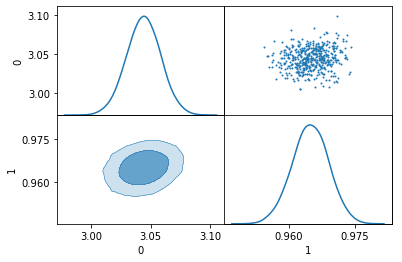

In [3]:
control.plot_2d([0,1])

(<Figure size 432x288 with 6 Axes>,
                                           0  \
 0  DiagonalAxes(0.125,0.5025;0.3875x0.3775)   
 1    AxesSubplot(0.125,0.125;0.3875x0.3775)   
 
                                           1  
 0  AxesSubplot(0.5125,0.5025;0.3875x0.3775)  
 1  DiagonalAxes(0.5125,0.125;0.3875x0.3775)  )

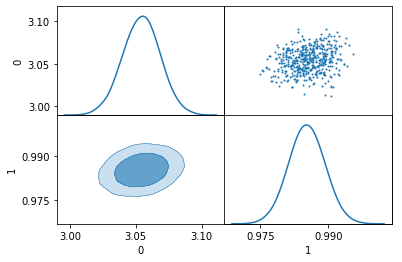

In [4]:
perturbation.plot_2d([0, 1])